# Optimization of Advertisement Using Machine Learning

This notebook demonstrates a detailed approach to optimizing advertisement performance using three machine learning models: Logistic Regression, Random Forest, and Support Vector Machine (SVM). The steps include data preprocessing, model training, evaluation, and visualization of results.

In [1]:
%pip install nbformat pandas scikit-learn matplotlib seaborn

## 1. Data Loading and Preprocessing
We begin by loading the dataset, handling any missing values, converting categorical variables to numerical values if necessary, and then splitting the data into features and target variables.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/Dissertation/advertisement_optimization_ml/advertising.csv'
df = pd.read_csv(file_path)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\\n", missing_values)

# Drop irrelevant columns
df_cleaned = df.drop(columns=['Ad Topic Line', 'City', 'Country', 'Timestamp'])

# Splitting data into features and target variable
X = df_cleaned.drop('Clicked on Ad', axis=1)
y = df_cleaned['Clicked on Ad']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first few rows after scaling
print("Scaled Training Data:\\n", pd.DataFrame(X_train_scaled[:5], columns=X_train.columns))
print("Scaled Testing Data:\\n", pd.DataFrame(X_test_scaled[:5], columns=X_test.columns))

Missing Values:\n Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64
Scaled Training Data:\n    Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
0                  0.681519 -1.591714    -0.663929              0.645655   
1                  0.853777 -0.458721     1.117805              0.604556   
2                  0.522463  0.221075     0.902470              1.431327   
3                  0.910987 -0.911918     0.262802              1.033125   
4                 -1.003970  1.127470    -0.437674             -1.505639   

       Male  
0 -0.955968  
1  1.046060  
2 -0.955968  
3 -0.955968  
4 -0.955968  
Scaled Testing Data:\n    Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
0    

## 2. Exploratory Data Analysis (EDA)\n
 Let's explore the data to gain insights and visualize the relationships between features and the target variable.

Descriptive Statistics:\n        Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%      

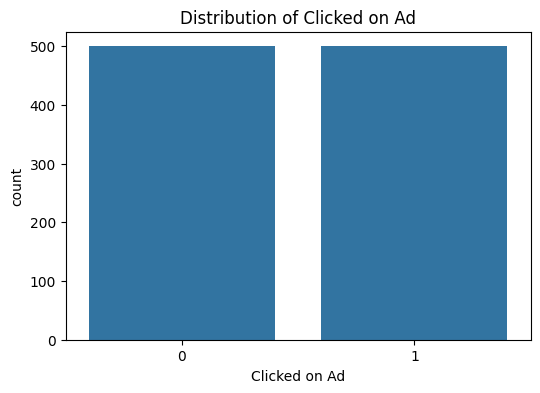

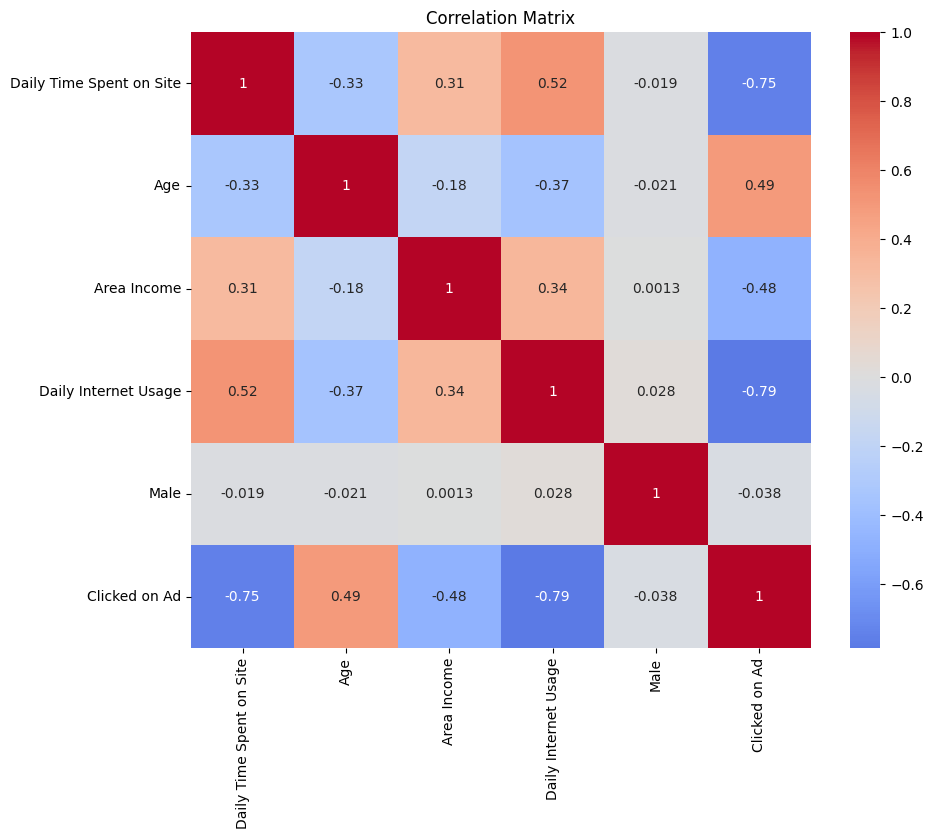

In [4]:
print("Descriptive Statistics:\\n", df_cleaned.describe())

# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Clicked on Ad', data=df_cleaned)
plt.title('Distribution of Clicked on Ad')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## 3. Model Training
We will train three different models: Logistic Regression, Random Forest, and SVM. We will also evaluate each model using accuracy, precision, recall, and F1-score.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

# Initialize the models
log_reg = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42, probability=True)

# Train the models
log_reg.fit(X_train_scaled, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test_scaled)

# Evaluate the models
def evaluate_model(y_test, y_pred):
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

# Collecting results
log_reg_results = evaluate_model(y_test, y_pred_log_reg)
random_forest_results = evaluate_model(y_test, y_pred_random_forest)
svm_results = evaluate_model(y_test, y_pred_svm)

log_reg_results, random_forest_results, svm_results

pickle.dump(log_reg, open('/content/drive/MyDrive/Dissertation/advertisement_optimization_ml/logistic_regression_model.pkl', 'wb'))
pickle.dump(random_forest, open('/content/drive/MyDrive/Dissertation/advertisement_optimization_ml/random_forest_model.pkl', 'wb'))
pickle.dump(svm, open('/content/drive/MyDrive/Dissertation/advertisement_optimization_ml/svm_model.pkl', 'wb'))

## 4. Model Comparison and Visualization
We will visualize the performance of these models using various plots:
- **Bar Plot**: To compare the accuracy, precision, recall, and F1 score of the three models.
- **Confusion Matrix**: To visualize the true positives, false positives, true negatives, and false negatives.
- **ROC Curve**: To evaluate the performance of the models across different threshold levels.

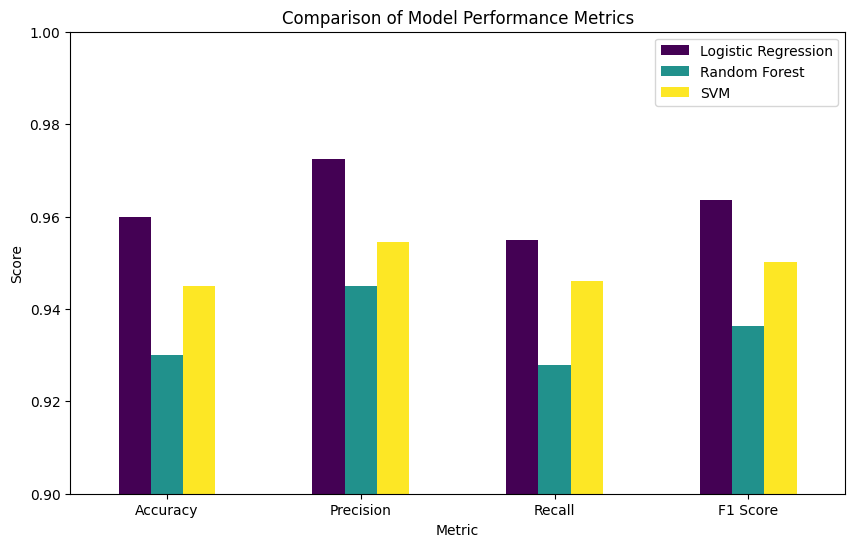

In [6]:
# Creating a DataFrame for visualization
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression': list(log_reg_results.values()),
    'Random Forest': list(random_forest_results.values()),
    'SVM': list(svm_results.values())
})

# Plotting the results
results_df.set_index('Metric').plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0.9, 1.0)
plt.xticks(rotation=0)
plt.show()

## 5. Model Testing
We will test the saved models on new data to ensure they work as expected

In [7]:
loaded_log_reg = pickle.load(open('/content/drive/MyDrive/Dissertation/advertisement_optimization_ml/logistic_regression_model.pkl', 'rb'))
loaded_random_forest = pickle.load(open('/content/drive/MyDrive/Dissertation/advertisement_optimization_ml/random_forest_model.pkl', 'rb'))
loaded_svm = pickle.load(open('/content/drive/MyDrive/Dissertation/advertisement_optimization_ml/svm_model.pkl', 'rb'))

# Make predictions using the loaded models
y_pred_loaded_log_reg = loaded_log_reg.predict(X_test_scaled)
y_pred_loaded_random_forest = loaded_random_forest.predict(X_test)
y_pred_loaded_svm = loaded_svm.predict(X_test_scaled)

# Evaluate the loaded models
loaded_log_reg_results = evaluate_model(y_test, y_pred_loaded_log_reg)
loaded_random_forest_results = evaluate_model(y_test, y_pred_loaded_random_forest)
loaded_svm_results = evaluate_model(y_test, y_pred_loaded_svm)

print("Loaded Logistic Regression Results:\\n", loaded_log_reg_results)
print("Loaded Random Forest Results:\\n", loaded_random_forest_results)
print("Loaded SVM Results:\\n", loaded_svm_results)

Loaded Logistic Regression Results:\n {'Accuracy': 0.96, 'Precision': 0.9724770642201835, 'Recall': 0.954954954954955, 'F1 Score': 0.9636363636363636}
Loaded Random Forest Results:\n {'Accuracy': 0.93, 'Precision': 0.944954128440367, 'Recall': 0.9279279279279279, 'F1 Score': 0.9363636363636363}
Loaded SVM Results:\n {'Accuracy': 0.945, 'Precision': 0.9545454545454546, 'Recall': 0.9459459459459459, 'F1 Score': 0.9502262443438914}


## 6. Model Comparison and Visualization
"We will visualize the performance of these models using various plots:\n"
"- **Bar Plot**: To compare the accuracy, precision, recall, and F1 score of the three models.\n"
"- **Confusion Matrix**: To visualize the true positives, false positives, true negatives, and false negatives.\n"
"- **ROC Curve**: To evaluate the performance of the models across different threshold levels."

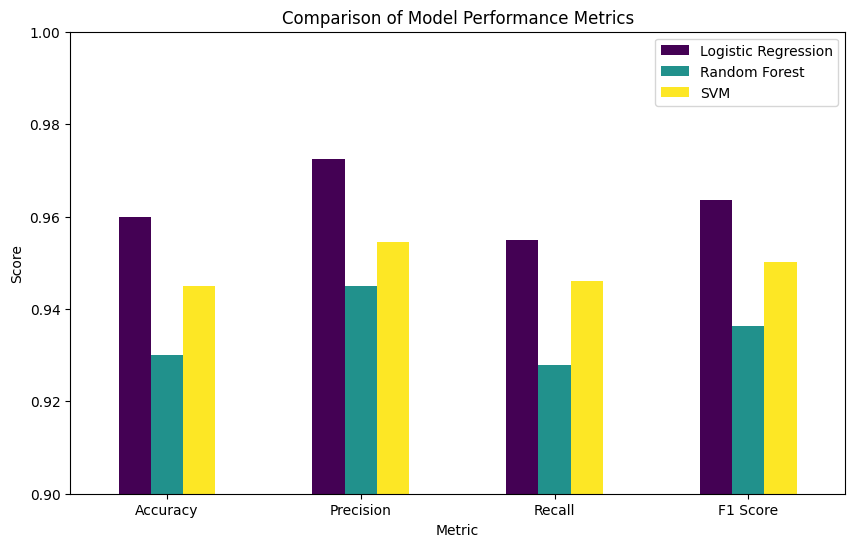

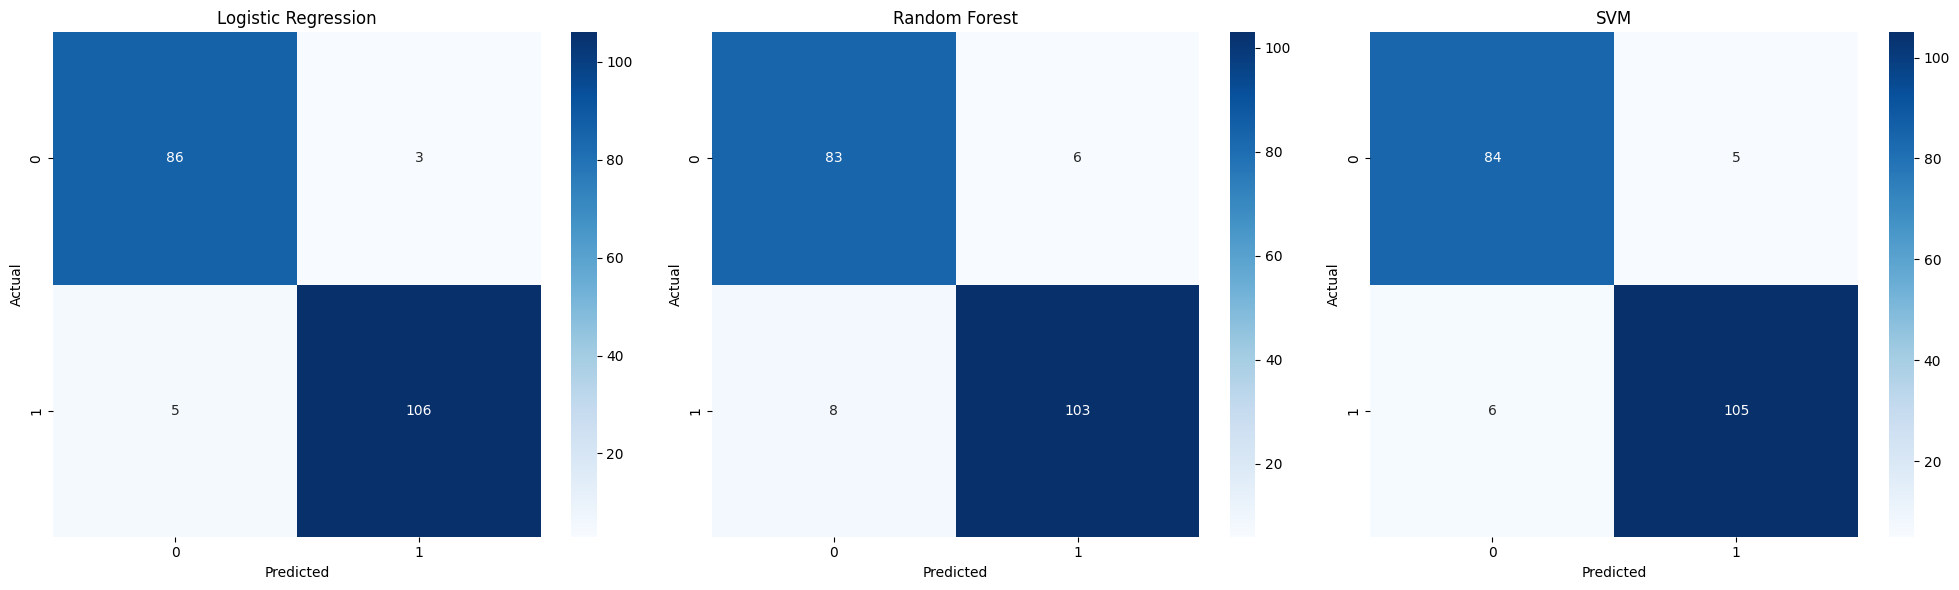

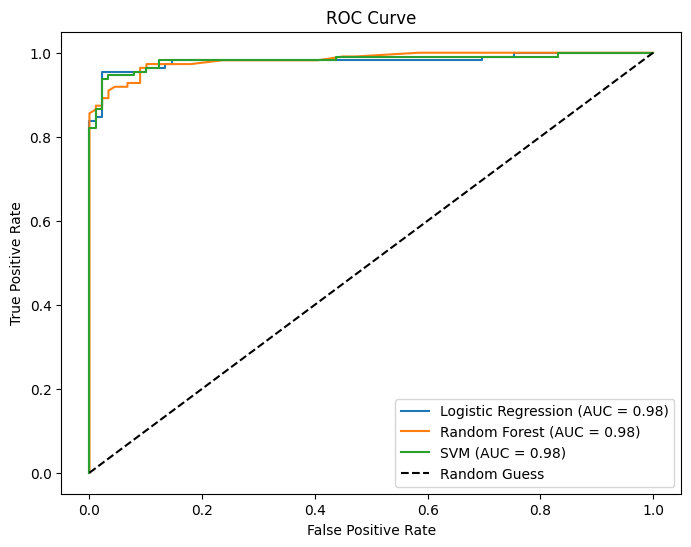

In [8]:
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression': list(log_reg_results.values()),
    'Random Forest': list(random_forest_results.values()),
    'SVM': list(svm_results.values())
})

# Plotting the results
results_df.set_index('Metric').plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0.9, 1.0)
plt.xticks(rotation=0)
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
models = [('Logistic Regression', y_pred_log_reg),
          ('Random Forest', y_pred_random_forest),
          ('SVM', y_pred_svm)]

for ax, (model_name, y_pred) in zip(axes, models):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve, auc

fig, ax = plt.subplots(figsize=(8, 6))
models = [('Logistic Regression', log_reg, X_test_scaled),
          ('Random Forest', random_forest, X_test),
          ('SVM', svm, X_test_scaled)]

for model_name, model, X in models:
    y_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], 'k--', label='Random Guess')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend()
plt.show()

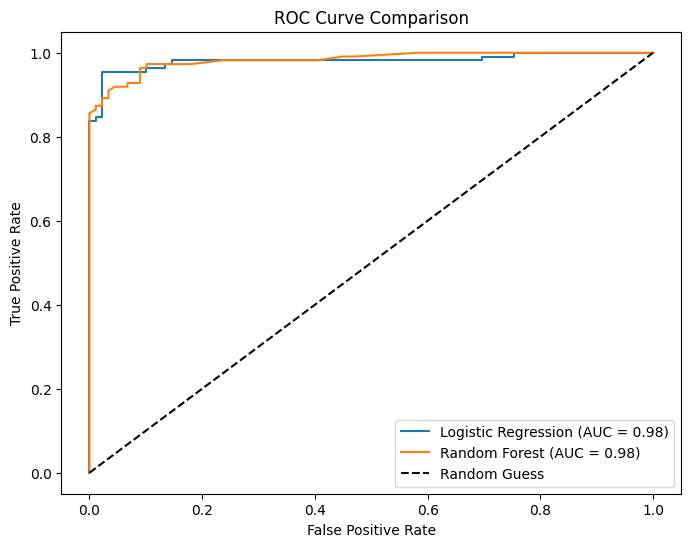

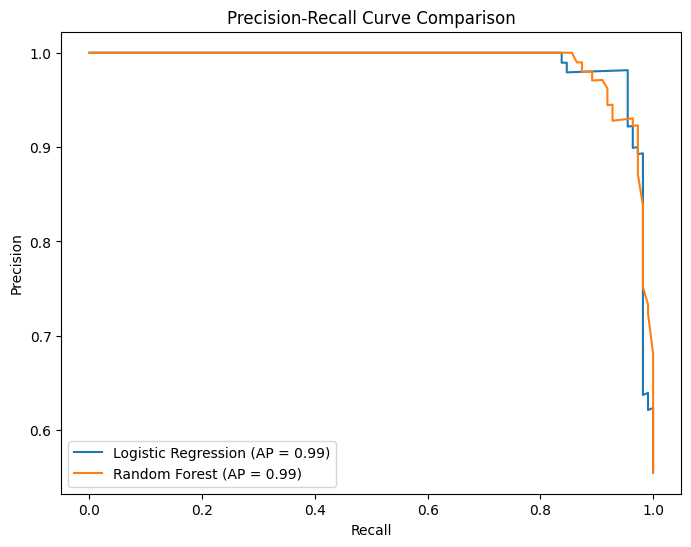

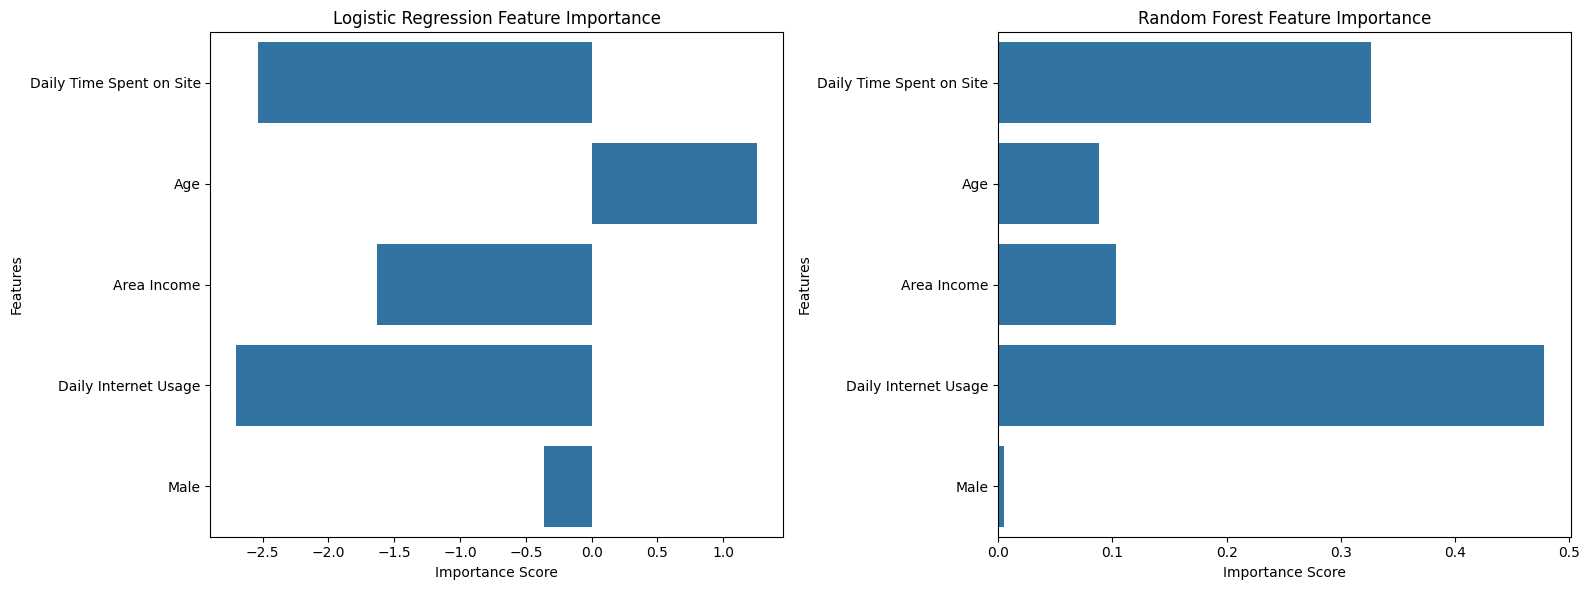

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Assuming you have already trained and evaluated the models as per the previous code

# ROC Curve comparison
fig, ax = plt.subplots(figsize=(8, 6))
models = [
    ('Logistic Regression', log_reg, X_test_scaled),
    ('Random Forest', random_forest, X_test)
]

for model_name, model, X in models:
    y_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], 'k--', label='Random Guess')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve Comparison')
ax.legend()
plt.show()

# Precision-Recall Curve comparison
fig, ax = plt.subplots(figsize=(8, 6))
models = [
    ('Logistic Regression', log_reg, X_test_scaled),
    ('Random Forest', random_forest, X_test)
]

for model_name, model, X in models:
    y_prob = model.predict_proba(X)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    avg_precision = average_precision_score(y_test, y_prob)
    ax.plot(recall, precision, label=f'{model_name} (AP = {avg_precision:.2f})')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve Comparison')
ax.legend()
plt.show()

# Feature Importance comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
models = [
    ('Logistic Regression', log_reg),
    ('Random Forest', random_forest)
]

for ax, (model_name, model) in zip(axes, models):
    if hasattr(model, 'coef_'):
        feature_importance = model.coef_[0]
    else:
        feature_importance = model.feature_importances_

    sns.barplot(x=feature_importance, y=X.columns, orient='h', ax=ax)
    ax.set_title(f'{model_name} Feature Importance')
    ax.set_xlabel('Importance Score')
    ax.set_ylabel('Features')

plt.tight_layout()
plt.show()

# Gradient Boosting Classifier

In [10]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (200, 5)
Shape of y: (1000,)


Gradient Boosting Classifier Results:
 {'Accuracy': 0.935, 'Precision': 0.9537037037037037, 'Recall': 0.9279279279279279, 'F1 Score': 0.9406392694063928}
Accuracy: 0.935


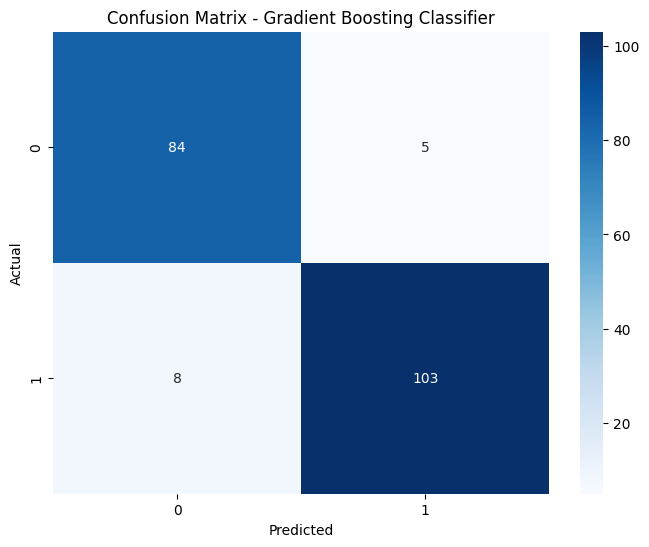

Classification Report - Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93        89
           1       0.95      0.93      0.94       111

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



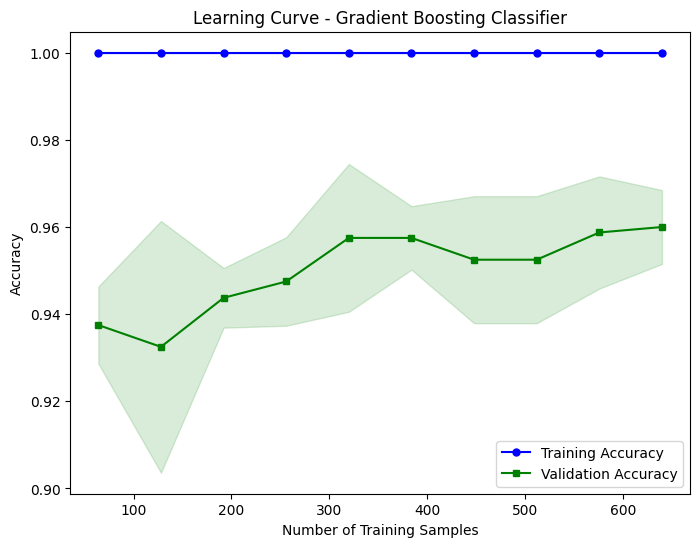

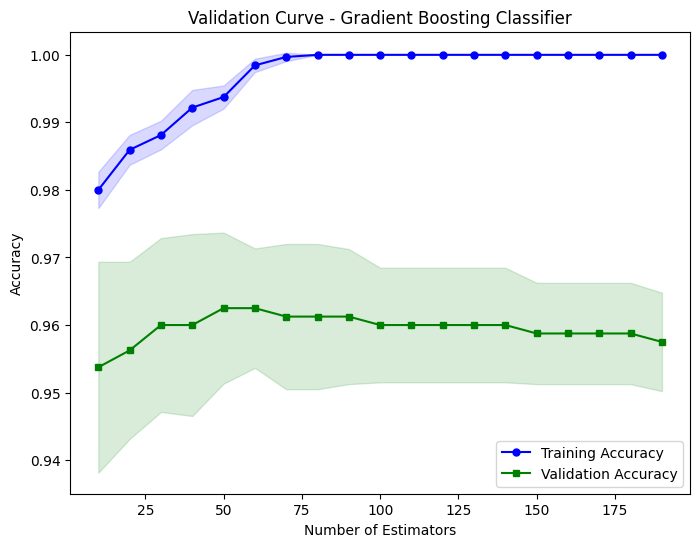

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best Score:  0.9625
Gradient Boosting Classifier model saved as 'gradient_boosting_model.pkl'


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, validation_curve, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import pickle

# Assuming the dataset is already loaded into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Dissertation/advertisement_optimization_ml/advertising.csv')  # Replace with your actual dataset path

# Check for categorical columns (assuming 'Ad Topic Line', 'City', 'Country' might be categorical)
categorical_columns = ['Ad Topic Line', 'City', 'Country']

# Convert categorical columns to numeric using Label Encoding
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Handle the 'Timestamp' column (convert to datetime and extract features)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Convert to datetime
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df = df.drop(columns=['Timestamp'])  # Drop the original 'Timestamp' column

# Feature matrix (X) and target vector (y)
X = df.drop(columns=['Clicked on Ad'])  # Features
y = df['Clicked on Ad']  # Target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

# Evaluate Gradient Boosting Classifier
gbc_results = evaluate_model(y_test, y_pred_gbc)
print("Gradient Boosting Classifier Results:\n", gbc_results)
print("Accuracy:", np.mean(y_pred_gbc == y_test))

# Confusion Matrix for Gradient Boosting Classifier
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbc, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report for Gradient Boosting Classifier
print("Classification Report - Gradient Boosting Classifier:\n", classification_report(y_test, y_pred_gbc))

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(gbc, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve - Gradient Boosting Classifier')
plt.show()

# Validation Curve
param_range = np.arange(10, 200, 10)
train_scores, test_scores = validation_curve(gbc, X_train, y_train, param_name='n_estimators', param_range=param_range, cv=5, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve - Gradient Boosting Classifier')
plt.show()

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Save the Gradient Boosting Classifier model
pickle.dump(gbc, open('/content/drive/MyDrive/Dissertation/advertisement_optimization_ml/gradient_boosting_model.pkl', 'wb'))
print("Gradient Boosting Classifier model saved as 'gradient_boosting_model.pkl'")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Results:
 {'Accuracy': 0.92, 'Precision': 0.9279279279279279, 'Recall': 0.9279279279279279, 'F1 Score': 0.9279279279279279}
Model Comparison:
                  Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression     0.960   0.972477  0.954955  0.963636
1        Random Forest     0.930   0.944954  0.927928  0.936364
2    Gradient Boosting     0.935   0.953704  0.927928  0.940639
3    Voting Classifier     0.920   0.927928  0.927928  0.927928


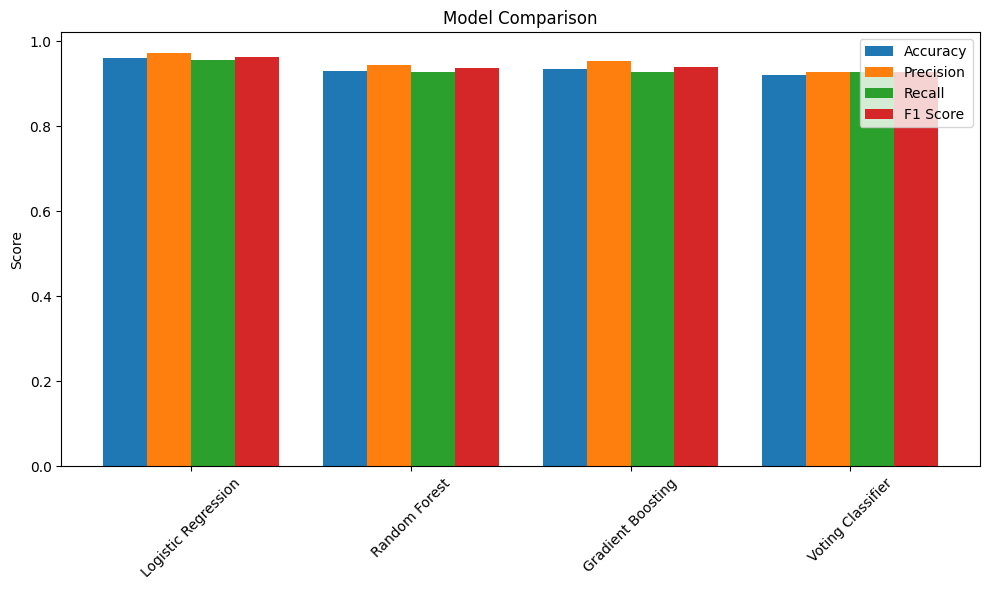

In [12]:
from sklearn.ensemble import VotingClassifier

# Assuming you have already trained Logistic Regression, Random Forest, and Gradient Boosting Classifier models

# Create a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', random_forest), ('gbc', gbc)],
    voting='soft'
)

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Make predictions using the Voting Classifier
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the Voting Classifier
voting_results = evaluate_model(y_test, y_pred_voting)
print("Voting Classifier Results:\n", voting_results)

# Compare all models
models = [
    ('Logistic Regression', log_reg_results),
    ('Random Forest', random_forest_results),
    ('Gradient Boosting', gbc_results),
    ('Voting Classifier', voting_results)
]

model_names = [name for name, _ in models]
accuracies = [results['Accuracy'] for _, results in models]
precisions = [results['Precision'] for _, results in models]
recalls = [results['Recall'] for _, results in models]
f1_scores = [results['F1 Score'] for _, results in models]

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

print("Model Comparison:\n", comparison_df)

# Plot the comparison
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(models))
width = 0.2

ax.bar(x - width*1.5, accuracies, width, label='Accuracy')
ax.bar(x - width/2, precisions, width, label='Precision')
ax.bar(x + width/2, recalls, width, label='Recall')
ax.bar(x + width*1.5, f1_scores, width, label='F1 Score')

ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45)
ax.set_ylabel('Score')
ax.set_title('Model Comparison')
ax.legend()

plt.tight_layout()
plt.show()